# Clean Data

### Imports

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns


## Clean NFL Combine Data

In [3]:
combine_file = r'data\nfl_combine_1987_2020.csv'

df_raw_combine = pd.read_csv(combine_file)

df_raw_combine.head()

# Keep raw data import for reference - build copy to modify
df_combine = df_raw_combine

# Drop dummy '0' column and Wonderlic scores data
combine_cols_to_drop = ['Unnamed: 0', 'Wonderlic']
df_combine.drop(columns=combine_cols_to_drop, inplace=True)

# Clean column headers
df_combine.columns = df_combine.columns.str.lower()
df_combine.rename(columns={'college':'school'}, inplace=True)

# Clean school names
df_combine['school'] = df_combine['school'].str.strip()

# Drop years prior to 2000 (no draft data)
print(df_combine.shape)
df_combine.drop(df_combine[df_combine['year']<2000].index, inplace=True)
print('Cleaned combine size: ', df_combine.shape)
df_combine.head()

(12808, 15)
Cleaned combine size:  (8465, 15)


,year,name,school,pos,height (in),weight (lbs),hand size (in),arm length (in),40 yard,bench press,vert leap (in),broad jump (in),shuttle,3cone,60yd shuttle
4343,2000,Darnell Alford,Boston College,OT,76.0,334,10.50,34.00,5.58,23.0,25.0,94.0,4.98,8.48,NaN
4344,2000,Kyle Allamon,Texas Tech,TE,74.5,253,9.88,31.00,5.01,NaN,29.0,104.0,4.49,7.29,12.47
4345,2000,Rashard Anderson,Jackson State (MS),CB,74.4,206,10.00,33.00,4.59,NaN,34.0,123.0,4.15,7.18,11.72
4346,2000,Corey Atkins,South Carolina,OLB,72.4,237,9.75,31.88,4.76,21.0,31.0,112.0,4.39,7.96,11.87
4347,2000,Reggie Austin,Wake Forest,CB,69.4,175,8.50,30.00,4.46,17.0,35.0,119.0,4.14,7.03,NaN


## Import position mapping data
The "combine" dataset maps players to very specific positions (ie, "Free Saftey" or "Outside Linebacker").

Map these granular positions to more standard positions. Also classify each position as "Offense" or "Defense", and indicate if the position is a "Skill" position or on the line of scrimmage.

In [4]:
df_positions = pd.read_csv('data/position_mapping.csv')
df_positions.head()

,pos,pos_group,offense_defense,line_or_skill
0,WR,WR,O,S
1,CB,CB,D,S
2,RB,RB,O,S
3,DE,DL,D,L
4,OT,OL,O,L


### Merge the draft and position mapping datasets

In [5]:
df_combine = df_combine.merge(df_positions,
                          how='left',
                          on='pos')

print(df_combine['pos_group'].value_counts())

df_combine.head()

OL      1409
DL      1331
WR      1095
LB      1027
CB       864
S        701
RB       700
TE       471
QB       470
K        200
FB       175
Snap      22
Name: pos_group, dtype: int64


,year,name,school,pos,height (in),weight (lbs),hand size (in),arm length (in),40 yard,bench press,vert leap (in),broad jump (in),shuttle,3cone,60yd shuttle,pos_group,offense_defense,line_or_skill
0,2000,Darnell Alford,Boston College,OT,76.0,334,10.50,34.00,5.58,23.0,25.0,94.0,4.98,8.48,NaN,OL,O,L
1,2000,Kyle Allamon,Texas Tech,TE,74.5,253,9.88,31.00,5.01,NaN,29.0,104.0,4.49,7.29,12.47,TE,O,S
2,2000,Rashard Anderson,Jackson State (MS),CB,74.4,206,10.00,33.00,4.59,NaN,34.0,123.0,4.15,7.18,11.72,CB,D,S
3,2000,Corey Atkins,South Carolina,OLB,72.4,237,9.75,31.88,4.76,21.0,31.0,112.0,4.39,7.96,11.87,LB,D,S
4,2000,Reggie Austin,Wake Forest,CB,69.4,175,8.50,30.00,4.46,17.0,35.0,119.0,4.14,7.03,NaN,CB,D,S


#### TODO:
Plot grid of histograms of position by data

https://www.machinelearningplus.com/plots/matplotlib-histogram-python-examples/

['OL', 'TE', 'CB', 'LB', 'S', 'DL', 'QB', 'RB', 'WR', 'FB']
Unique Positions:  10
Index(['year', 'name', 'school', 'pos', 'height (in)', 'weight (lbs)',
       'hand size (in)', 'arm length (in)', '40 yard', 'bench press',
       'vert leap (in)', 'broad jump (in)', 'shuttle', '3cone', '60yd shuttle',
       'pos_group', 'offense_defense', 'line_or_skill'],
      dtype='object')


C:\Users\mitch\AppData\Local\Temp/ipykernel_21280/2071691044.py:52: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


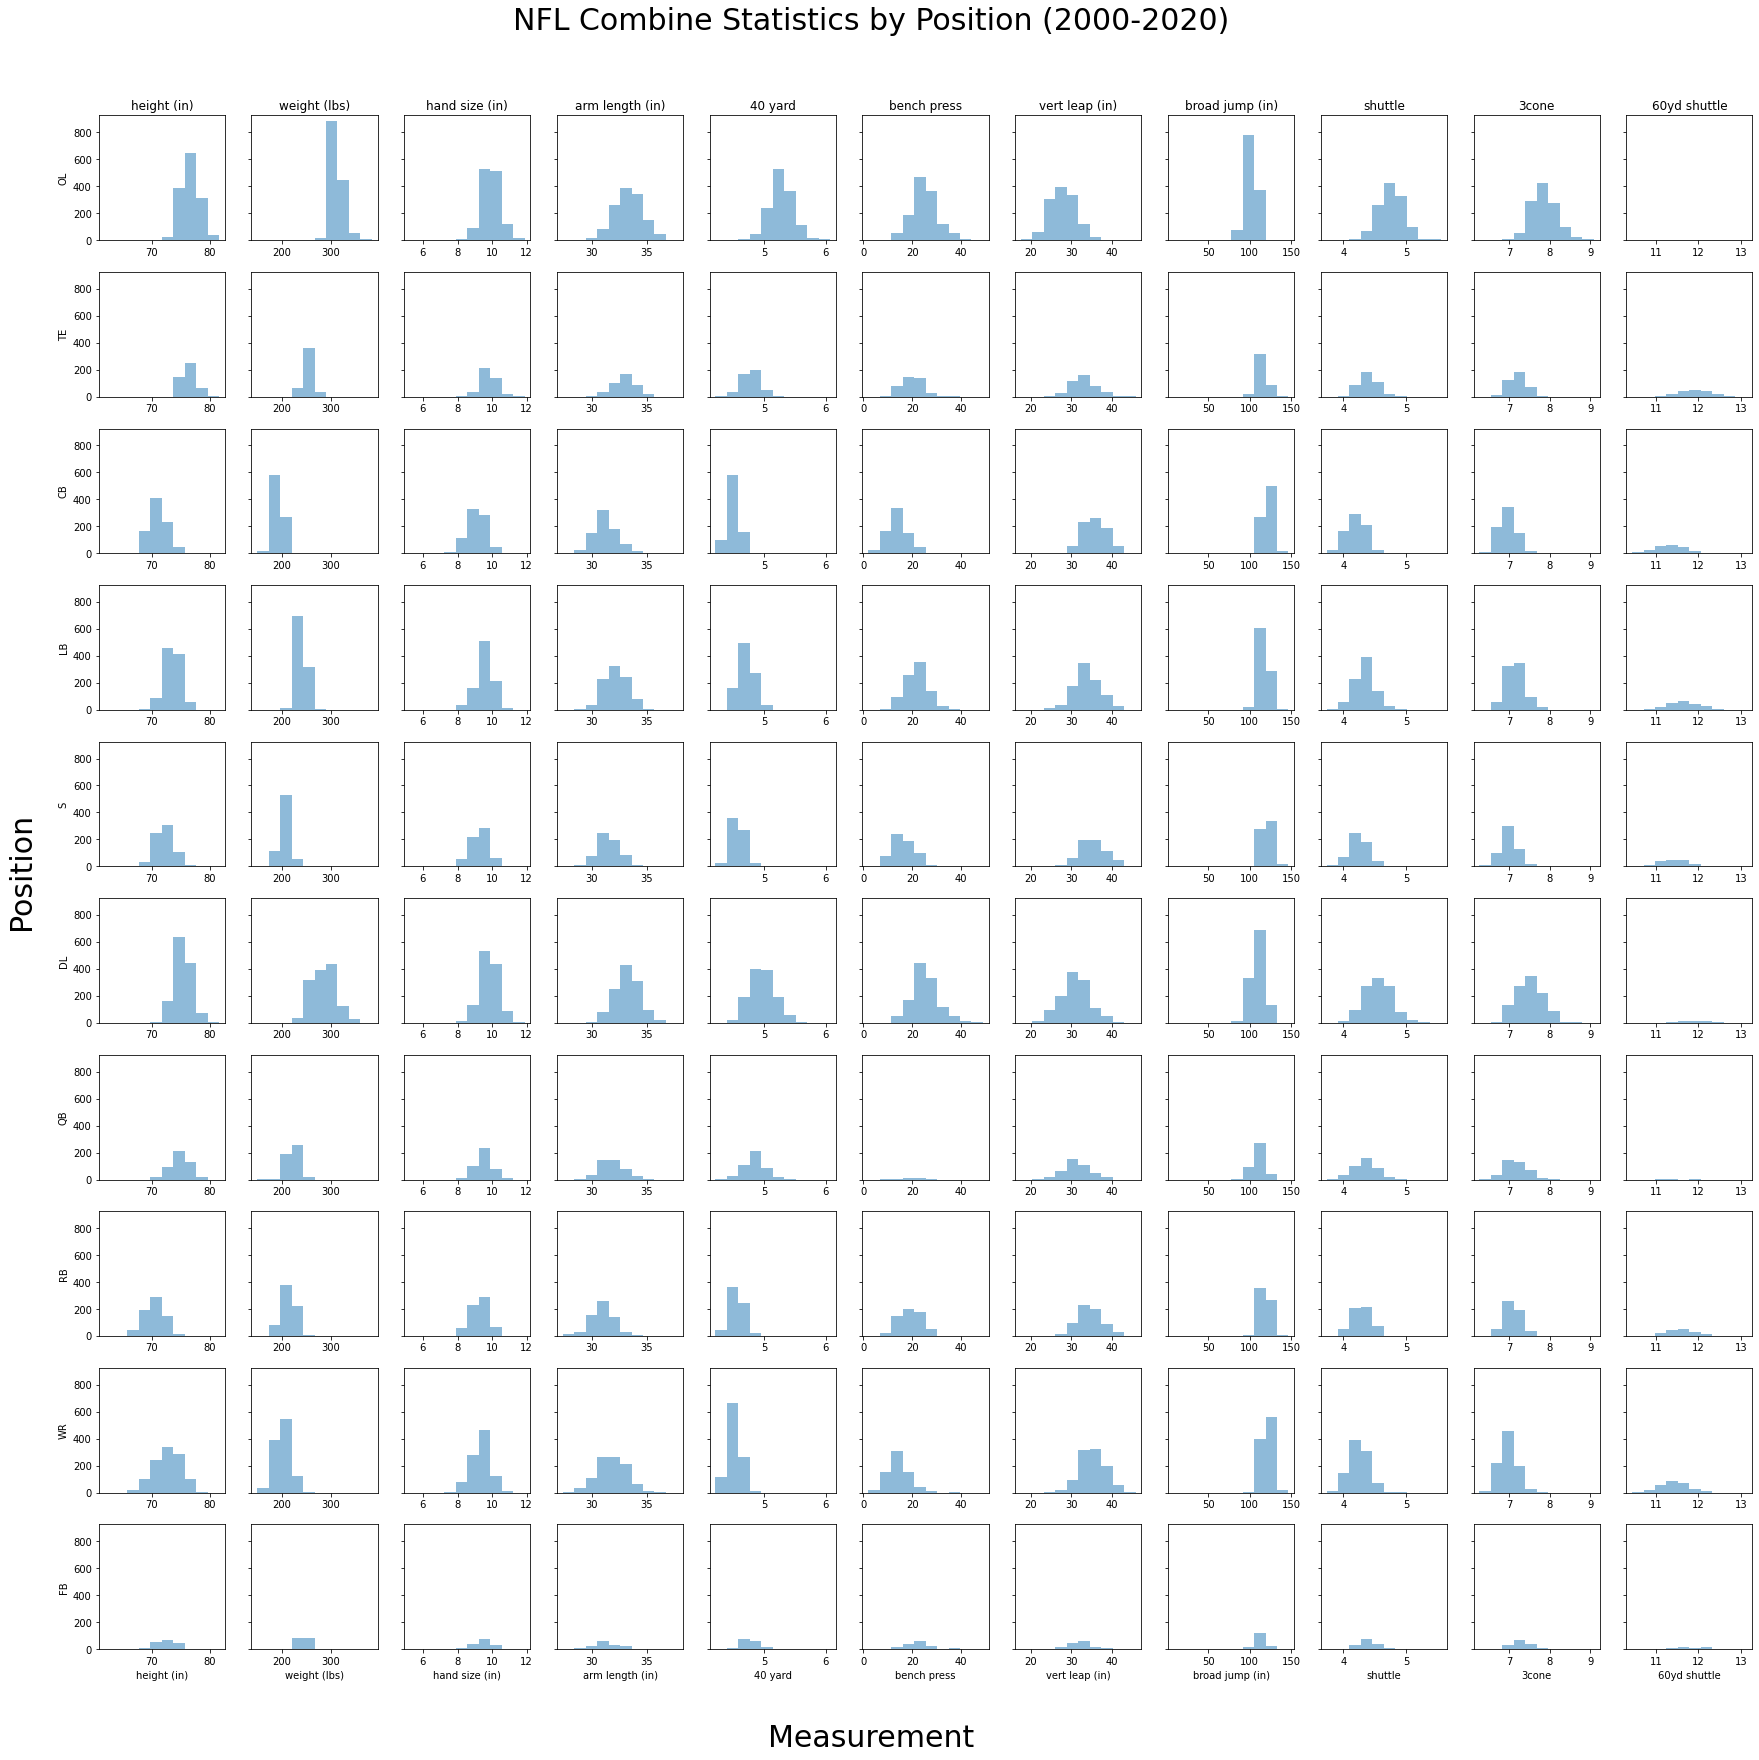

In [6]:
positions = df_combine['pos_group'].unique()

positions_to_drop = ['Snap', 'K']   # Long snappers and kickers/punters

positions = [pos for pos in positions if pos not in positions_to_drop]
print(positions)


print('Unique Positions: ', len(positions))
print(df_combine.columns)
stat_columns = ['height (in)', 'weight (lbs)',
       'hand size (in)', 'arm length (in)', '40 yard', 'bench press',
       'vert leap (in)', 'broad jump (in)', 'shuttle', '3cone', '60yd shuttle']
num_stats = len(stat_columns)
fig, axes = plt.subplots(len(positions), num_stats,
                         sharex=False,
                         sharey=True,
                         figsize=(25,25))


fig.suptitle('NFL Combine Statistics by Position (2000-2020)', fontsize=30)
fig.supxlabel('Measurement', fontsize=30)
fig.supylabel('Position', fontsize=30)

# fig.get_axes()[0].annotate('Long Suptitle', (0.5, 0.95),
#                             xycoords='figure fraction', ha='center',
#                             fontsize=24
#                             )
fig.tight_layout(rect=[0.03, 0.03, 1, .95])

# Loop over axes and data
for row, pos in enumerate(positions):
    x_positions = df_combine[df_combine['pos_group']==pos]

    for col, stat in enumerate(stat_columns):
        # Get axis
        ax = axes[row,col]
        x = x_positions[stat]
        ax.hist(x,
                range=[df_combine[stat].min(),df_combine[stat].max()],
                alpha=.5, bins=10)
        # Set Y label once per row
        if col==0:
            ax.set_ylabel(pos)

        # Set X label once per column
        if row == 0:
            ax.set_title(stat)
        if row == len(positions) - 1:
            ax.set_xlabel(stat)

fig.show()
fig.savefig('images/stats_by_position.png', format='png')


## Clean NFL Draft Data

In [7]:
draft_file = r'data\espn_draft_history_2000_2021_cleaned.csv'
df_raw_draft = pd.read_csv(draft_file)

# Keep raw data import for reference - build copy to modify
df_draft = df_raw_draft

# Clean column headers
df_draft.columns = df_draft.columns.str.lower()

# Clean school names
df_draft['school'] = df_draft['school'].str.strip()


In [8]:
# combine results by position
df_combine['pos'].value_counts()


WR     1095
CB      864
RB      700
DE      657
DT      647
OT      618
OLB     586
OG      528
TE      471
QB      470
ILB     350
FS      347
SS      298
C       253
FB      175
P       108
K        92
LB       91
S        53
LS       22
EDG      22
OL       10
DL        4
DB        3
NT        1
Name: pos, dtype: int64

### Are there duplicated names?

In [9]:
df_combine['name'].value_counts(sort='descending').head(10)

Brandon Williams    5
Chris Brown         5
Brian Allen         4
Mike Williams       4
Chris Jones         4
Michael Bennett     3
Josh Harris         3
Travis Wilson       3
Steve Smith         3
Andre Smith         3
Name: name, dtype: int64

### Answer: Yes

So we cannot simply join the 2 datasets on player 'name' columns. Need to also join on
college and year.


## Do college names match in both datasets?

In [10]:
draft_school = pd.DataFrame(df_draft['school'].unique()).rename(columns={0:'school'})
draft_school['source'] = 'draft'
combine_school = pd.DataFrame(df_combine['school'].unique()).rename(columns={0:'school'})
combine_school['source'] = 'combine'
print(type(combine_school))
print(combine_school.head())

schools = draft_school.merge(combine_school, on='school', how='outer',
                             suffixes=['_draft', '_combine']).sort_values(by='school')

# List all cases with mismatches
na_mask = schools.isna().any(axis=1)
print(schools[na_mask])

<class 'pandas.core.frame.DataFrame'>
               school   source
0      Boston College  combine
1          Texas Tech  combine
2  Jackson State (MS)  combine
3      South Carolina  combine
4         Wake Forest  combine
                       school source_draft source_combine
202         Abilene Christian        draft            NaN
381    Abilene Christian (TX)          NaN        combine
445          Adams State (CO)          NaN        combine
345        Alabama-Birmingham          NaN        combine
200                    Albany        draft            NaN
..                        ...          ...            ...
225             Winston-Salem        draft            NaN
348  Winston-Salem State (NC)          NaN        combine
280          Youngstown State        draft            NaN
325     Youngstown State (OH)          NaN        combine
103                       NaN        draft        combine

[315 rows x 3 columns]


### So we see that the 'combine' dataset frequently has the state appended to the school name;
Ex: "Abilene Christian (TX)". Remove these from school names, with the exception of "Miami (OH).

In [11]:
df_combine['school'] = df_combine['school'].str.replace('Miami (OH)', 'Miami - OH')

print(df_combine['school'].head())
regex_replace_parens = r'\([^)]*[a-zA-Z][^)]*\)'
df_combine['school'] = df_combine['school'].str.replace(regex_replace_parens, '', regex=True)

print(df_combine['school'].head())

# pd.DataFrame(df_combine['school'].unique()).to_clipboard()
#
# schools2 = df_draft.merge(df_combine,
#                           on='school', how='outer',
#                           suffixes=['_draft', '_combine']).sort_values(by='school')
#
# na_mask = schools2.isna().any(axis=1)
# schools2[na_mask]
# pd.concat([df_combine['school'], df_draft['school']], join='outer')

#df_combine.merge(df_draft, how='left', on='school')

0        Boston College
1            Texas Tech
2    Jackson State (MS)
3        South Carolina
4           Wake Forest
Name: school, dtype: object
0    Boston College
1        Texas Tech
2    Jackson State 
3    South Carolina
4       Wake Forest
Name: school, dtype: object


C:\Users\mitch\AppData\Local\Temp/ipykernel_21280/381561832.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_combine['school'] = df_combine['school'].str.replace('Miami (OH)', 'Miami - OH')


## Standardize player names between datasets
Player names in the "Draft" dataset include suffixes including "Jr., II, III, IV", but these are NOT included in the "combine" dataset.

Standardize player names between datasets by removing these values from the "Draft" dataset.

In [12]:
regex_suffixes_to_remove = r'Jr\.$|III$|IIII$|IV$|, Jr.$'
df_draft['name'] = df_draft['name'].str.replace(regex_suffixes_to_remove, '', regex=True)

# df_draft['name'].to_clipboard()



Merge the Draft and NFL Combine datasets

In [13]:
df_merged = df_combine.merge(df_draft, how='left',
                             on=['name', 'school', 'year'])

df_merged.head(10)

# df_merged.to_clipboard()

,year,name,school,pos,height (in),weight (lbs),hand size (in),arm length (in),40 yard,bench press,...,shuttle,3cone,60yd shuttle,pos_group,offense_defense,line_or_skill,round,pk(ovr),team,position
0,2000,Darnell Alford,Boston College,OT,76.0,334,10.50,34.00,5.58,23.0,...,4.98,8.48,NaN,OL,O,L,6.0,22(188),Chiefs,OT
1,2000,Kyle Allamon,Texas Tech,TE,74.5,253,9.88,31.00,5.01,NaN,...,4.49,7.29,12.47,TE,O,S,NaN,NaN,NaN,NaN
2,2000,Rashard Anderson,Jackson State,CB,74.4,206,10.00,33.00,4.59,NaN,...,4.15,7.18,11.72,CB,D,S,NaN,NaN,NaN,NaN
3,2000,Corey Atkins,South Carolina,OLB,72.4,237,9.75,31.88,4.76,21.0,...,4.39,7.96,11.87,LB,D,S,NaN,NaN,NaN,NaN
4,2000,Reggie Austin,Wake Forest,CB,69.4,175,8.50,30.00,4.46,17.0,...,4.14,7.03,NaN,CB,D,S,4.0,31(125),Bears,DB
5,2000,Mark Baniewicz,Syracuse,OT,77.9,312,9.25,32.75,5.36,20.0,...,4.73,7.72,NaN,OL,O,L,7.0,41(247),Jaguars,OT
6,2000,Rashidi Barnes,Colorado,FS,71.6,208,9.50,32.00,4.63,10.0,...,4.32,6.92,11.35,S,D,S,7.0,19(225),Browns,DB
7,2000,David Barrett,Arkansas,CB,69.9,199,10.00,31.13,4.48,16.0,...,4.04,6.81,10.77,CB,D,S,4.0,8(102),Cardinals,DB
8,2000,William Bartee,Oklahoma,CB,73.0,192,NaN,NaN,4.43,NaN,...,3.99,6.70,NaN,CB,D,S,2.0,23(54),Chiefs,DB
9,2000,Terrance Beadles,Arkansas-Pine Bluff,OG,74.9,312,10.13,33.00,5.21,29.0,...,NaN,NaN,NaN,OL,O,L,NaN,NaN,NaN,NaN


## Investigate merged data

In [14]:
df_merged.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 8465 entries, 0 to 8464
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year             8465 non-null   int64  
 1   name             8465 non-null   object 
 2   school           8462 non-null   object 
 3   pos              8465 non-null   object 
 4   height (in)      8465 non-null   float64
 5   weight (lbs)     8465 non-null   int64  
 6   hand size (in)   7639 non-null   float64
 7   arm length (in)  7638 non-null   float64
 8   40 yard          7922 non-null   float64
 9   bench press      6603 non-null   float64
 10  vert leap (in)   7503 non-null   float64
 11  broad jump (in)  7400 non-null   float64
 12  shuttle          6929 non-null   float64
 13  3cone            6827 non-null   float64
 14  60yd shuttle     1370 non-null   float64
 15  pos_group        8465 non-null   object 
 16  offense_defense  8465 non-null   object 
 17  line_or_skill 